In [12]:
import pandas as pd
import numpy as np
import cPickle as pickle
import patsy
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

path = '../assets/train_w_weather.p'

with open(path, 'rb') as f:
    master_df = pickle.load(f)


In [2]:
master_df

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,SunsetVal,Diff
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0,0.0,0.00,29.39,30.11,5.8,18,6.5,1917,14.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0,0.0,0.00,29.39,30.11,5.8,18,6.5,1917,14.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,0,0.0,0.00,29.39,30.11,5.8,18,6.5,1917,14.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,0,0.0,0.00,29.39,30.11,5.8,18,6.5,1917,14.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,0,0.0,0.00,29.39,30.11,5.8,18,6.5,1917,14.0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,...,0,0.0,0.00,29.44,30.09,5.8,16,7.4,0,0.0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,...,0,0.0,0.00,29.44,30.09,5.8,16,7.4,0,0.0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,0,0.0,0.00,29.44,30.09,5.8,16,7.4,0,0.0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,0,0.0,0.00,29.44,30.09,5.8,16,7.4,0,0.0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,0,0.0,0.00,29.44,30.09,5.8,16,7.4,0,0.0


In [3]:
for i,x in enumerate(master_df.columns.values):
    print i, x

0 Date
1 Address
2 Species
3 Block
4 Street
5 Trap
6 AddressNumberAndStreet
7 Latitude
8 Longitude
9 AddressAccuracy
10 NumMosquitos
11 WnvPresent
12 STATION1DIST
13 STATION2DIST
14 STATION1PCT
15 STATION2PCT
16 CLOSER_STATION
17 Unnamed: 0
18 Station
19 Tmax
20 Tmin
21 Tavg
22 Depart
23 DewPoint
24 WetBulb
25 Heat
26 Cool
27 Sunrise
28 Sunset
29 CodeSum
30 Depth
31 SnowFall
32 PrecipTotal
33 StnPressure
34 SeaLevel
35 ResultSpeed
36 ResultDir
37 AvgSpeed
38 SunsetVal
39 Diff


In [31]:
weather_columns = [x for x in master_df.columns[19:] if x not in ('Sunrise','Sunset','SunsetVal')]
weather_columns

['Tmax',
 'Tmin',
 'Tavg',
 'Depart',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'CodeSum',
 'Depth',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'Diff']

In [39]:
formula = 'WnvPresent ~ Species + Block + ' + ' + '.join(weather_columns)
formula

'WnvPresent ~ Species + Block + Tmax + Tmin + Tavg + Depart + DewPoint + WetBulb + Heat + Cool + CodeSum + Depth + SnowFall + PrecipTotal + StnPressure + SeaLevel + ResultSpeed + ResultDir + AvgSpeed + Diff'

In [40]:
y,X = patsy.dmatrices(formula, data=master_df, return_type = 'dataframe')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

(7354, 52) (3152, 52) (7354, 1) (3152, 1)


In [46]:
dtc = DecisionTreeClassifier( max_depth=3, min_samples_split=10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [47]:
score = cross_val_score(dtc,X_train,y_train, cv=5, verbose=2)

[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   0.0s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   0.0s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   0.0s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   0.0s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [48]:
print score, np.mean(score)

[ 0.94497283  0.94493542  0.94561523  0.9462585   0.9462585 ] 0.945608095742


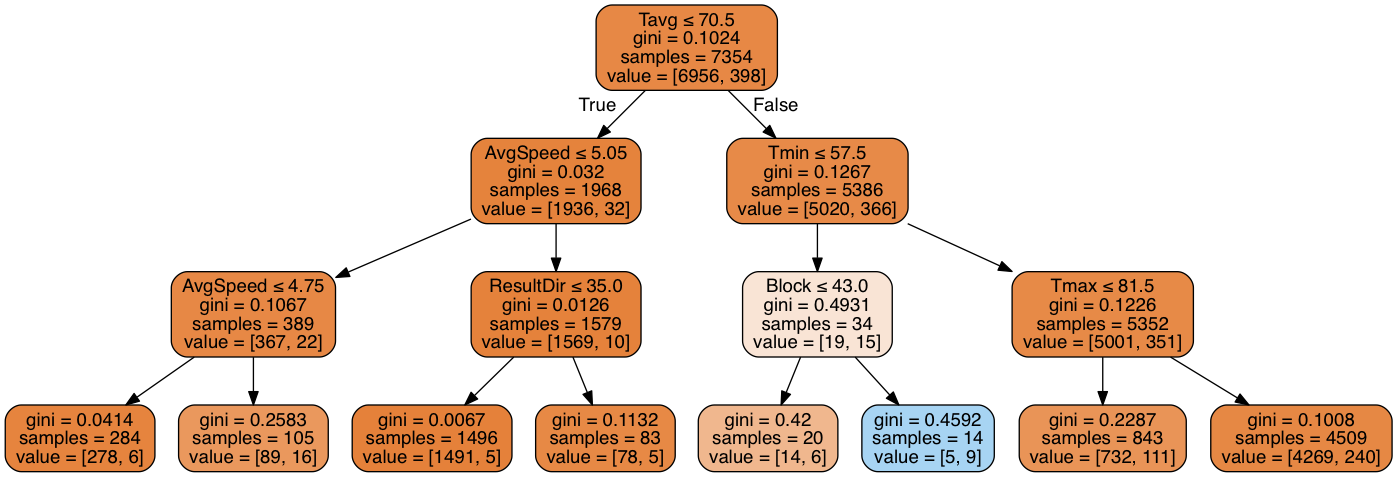

In [49]:
# TEMPLATE CODE

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  